In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data_path = r'data/Loan/loan-10.lrn.csv'
df = pd.read_csv(data_path)

In [4]:
df['season'].replace({-1: 'winter', -0.33: 'spring', 0.33: 'summer', 1:'fall'}, inplace=True)
df['high_fever'].replace({-1: '<3month', 0: '>3month', 1: 'no'}, inplace=True)
df['smoking'].replace({-1: 'never', 0: 'occasional', 1: 'daily'}, inplace=True)
df['alcohol_consumption'].replace({0.2: 'several times/day',
0.4: 'daily',
0.6: 'several times/week',
0.8: 'once/week',
1: 'hardly ever/never'}, inplace=True)

df['age'] = df['age'] * (36 - 18) + 18
df['hours_sitting'] = df['hours_sitting'] * (16 - 0) + 0

In [5]:
df.columns

Index(['season', 'age', 'diseases', 'accidents_trauma',
       'surgical_intervention', 'high_fever', 'alcohol_consumption', 'smoking',
       'hours_sitting', 'diagnosis'],
      dtype='object')

# Data exploration

[Text(0, 0, '0.88'), Text(0, 0, '0.12')]

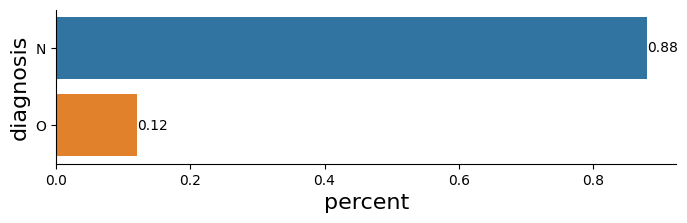

In [6]:
class_counts = df['diagnosis'].value_counts()/len(df['diagnosis'])
_, ax = plt.subplots(figsize=(8, 2))
sns.despine()
b = sns.barplot(x=class_counts.values, y=class_counts.index)
# ax.set(title='Distribution of values in target diagnosis variable')
b.set_xlabel('percent', fontsize=16)
b.set_ylabel('diagnosis', fontsize=16)
ax.bar_label(ax.containers[0], fmt='{:.2f}')

In [9]:
list([i for i in range(27, 37)])

[27, 28, 29, 30, 31, 32, 33, 34, 35, 36]

/tmp/ipykernel_7913/3851201302.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels([str(i) for i in b.get_yticks()], fontsize = 14)


[Text(0, 0.0, '0.0'),
 Text(0, 5.0, '5.0'),
 Text(0, 10.0, '10.0'),
 Text(0, 15.0, '15.0'),
 Text(0, 20.0, '20.0'),
 Text(0, 25.0, '25.0'),
 Text(0, 30.0, '30.0')]

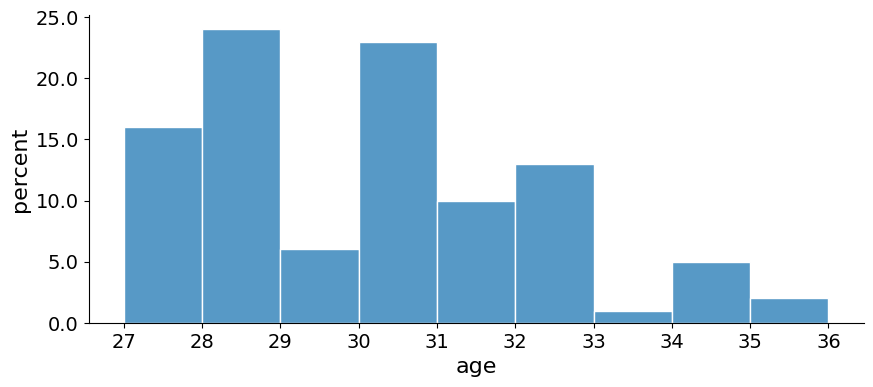

In [16]:
_, ax = plt.subplots(figsize=(10, 4))
sns.despine()
b = sns.histplot(df, x=df.age.astype(int), ax=ax, edgecolor='white', stat='percent', bins=9)
b.set_xlabel('age', fontsize=16)
b.set_ylabel('percent', fontsize=16)
ax.set_xticks(range(27, 37), labels=range(27, 37), fontsize=14)
b.set_yticklabels([str(i) for i in b.get_yticks()], fontsize = 14)
# ax.set_title('Distribution of age')

/tmp/ipykernel_7913/3448270444.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels([str(i) for i in b.get_yticks()], fontsize = 14)


[Text(0, 0.0, '0.0'),
 Text(0, 5.0, '5.0'),
 Text(0, 10.0, '10.0'),
 Text(0, 15.0, '15.0'),
 Text(0, 20.0, '20.0'),
 Text(0, 25.0, '25.0'),
 Text(0, 30.0, '30.0')]

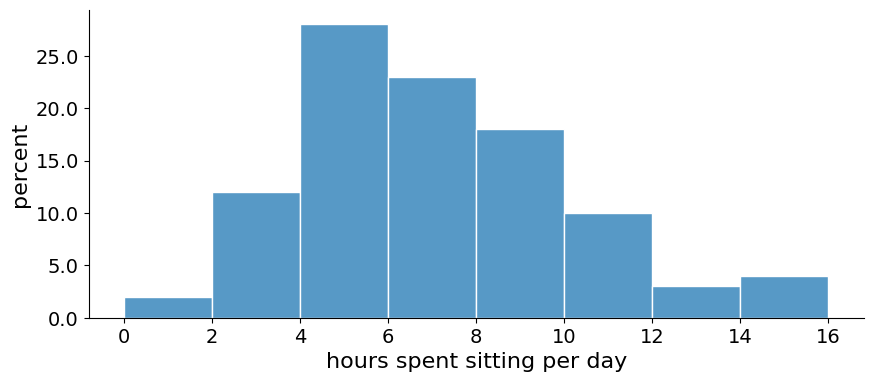

In [28]:
_, ax = plt.subplots(figsize=(10, 4))
sns.despine()
b = sns.histplot(df, x='hours_sitting', ax=ax, edgecolor='white', stat='percent', bins=range(0,18,2))
b.set_xlabel('hours spent sitting per day', fontsize=16)
b.set_ylabel('percent', fontsize=16)
ax.set_xticks(range(0, 18, 2), labels=range(0, 18, 2), fontsize=14)
b.set_yticklabels([str(i) for i in b.get_yticks()], fontsize = 14)
# ax.set(title='Distribution of number of hours spent sitting per day', xlabel='hours sitting per day')

[Text(0, 0, '63.00'), Text(0, 0, '28.00'), Text(0, 0, '9.00')]

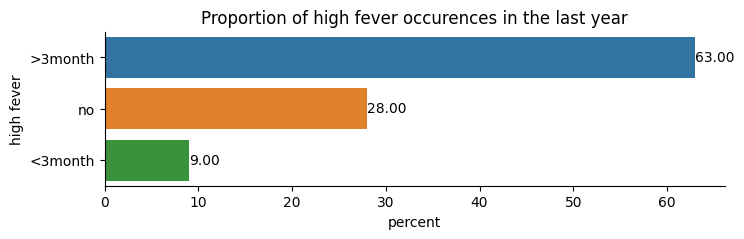

In [90]:
fever_counts = df['high_fever'].value_counts()/len(df['high_fever']) * 100
_, ax = plt.subplots(figsize=(8, 2))
sns.despine()
sns.barplot(x=fever_counts.values, y=fever_counts.index)
ax.set(title='Proportion of high fever occurences in the last year', xlabel='percent', ylabel='high fever')
ax.bar_label(ax.containers[0], fmt='{:.2f}')

[Text(0, 0, '56.00'), Text(0, 0, '23.00'), Text(0, 0, '21.00')]

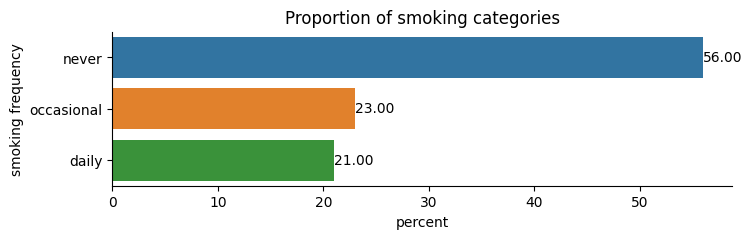

In [93]:
smoking_counts = df['smoking'].value_counts()/len(df['smoking']) * 100
_, ax = plt.subplots(figsize=(8, 2))
sns.despine()
sns.barplot(x=smoking_counts.values, y=smoking_counts.index)
ax.set(title='Proportion of smoking categories', xlabel='percent', ylabel='smoking frequency')
ax.bar_label(ax.containers[0], fmt='{:.2f}')

[Text(0, 0, '40.00'),
 Text(0, 0, '39.00'),
 Text(0, 0, '19.00'),
 Text(0, 0, '1.00'),
 Text(0, 0, '1.00')]

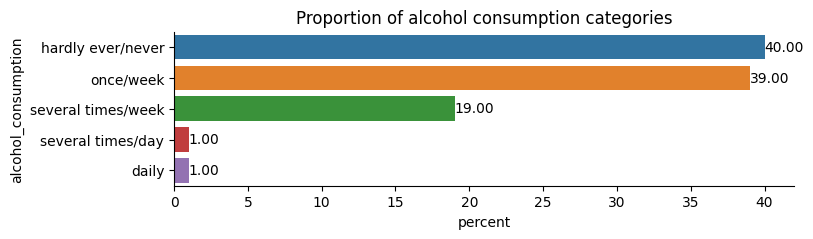

In [94]:
alc_counts = df['alcohol_consumption'].value_counts()/len(df['alcohol_consumption']) * 100
_, ax = plt.subplots(figsize=(8, 2))
sns.despine()
sns.barplot(x=alc_counts.values, y=alc_counts.index)
ax.set(title='Proportion of alcohol consumption categories', xlabel='percent', ylabel='alcohol_consumption')
ax.bar_label(ax.containers[0], fmt='{:.2f}')

[Text(0, 0, '37.00'),
 Text(0, 0, '31.00'),
 Text(0, 0, '28.00'),
 Text(0, 0, '4.00')]

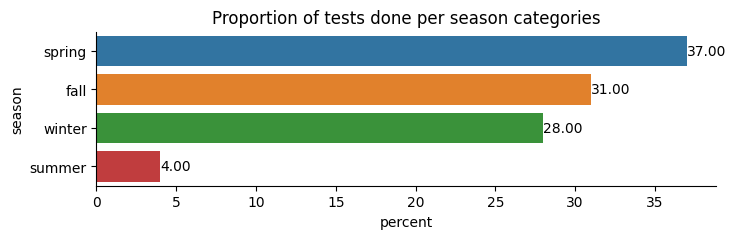

In [92]:
season_counts = df['season'].value_counts()/len(df['season']) * 100
_, ax = plt.subplots(figsize=(8, 2))
sns.despine()
sns.barplot(x=season_counts.values, y=season_counts.index)
ax.set(title='Proportion of tests done per season categories', xlabel='percent', ylabel='season')
ax.bar_label(ax.containers[0], fmt='{:.2f}')

# Data preprocessing

Encoding:
- 1-to-N: season
- label: high_fever, alcohol_consumption, smoking

Normalization: age, hours_sitting

Replace N (normal sample) with 0, O (altered sample) with 1

In [22]:
df = df.drop('season', axis=1).join(pd.get_dummies(df.season))
df['high_fever'].replace({'<3month': 2, '>3month': 1, 'no': 0}, inplace=True)
df['smoking'].replace({'never': 0, 'occasional': 1, 'daily': 2}, inplace=True)
df['alcohol_consumption'].replace({'several times/day': 4,
                                   'daily': 3,
                                   'several times/week': 2,
                                   'once/week': 1,
                                   'hardly ever/never': 0}, inplace=True)
df['diagnosis'].replace({'O': 1, 'N': 0}, inplace=True)